Combined dataset shape: (75682, 3)
sentiment
Negative      22808
Positive      21109
Neutral       18603
Irrelevant    13162
Name: count, dtype: int64


C:\Users\HEWLETT PACKARD\AppData\Local\Temp\ipykernel_23648\4153399085.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='coolwarm')


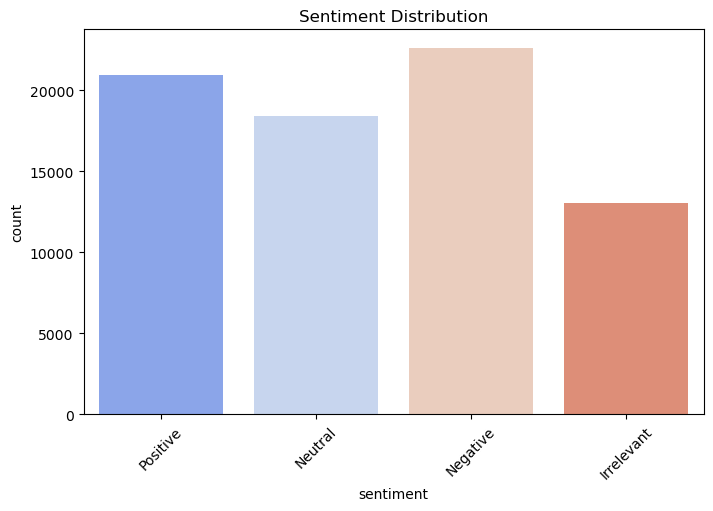

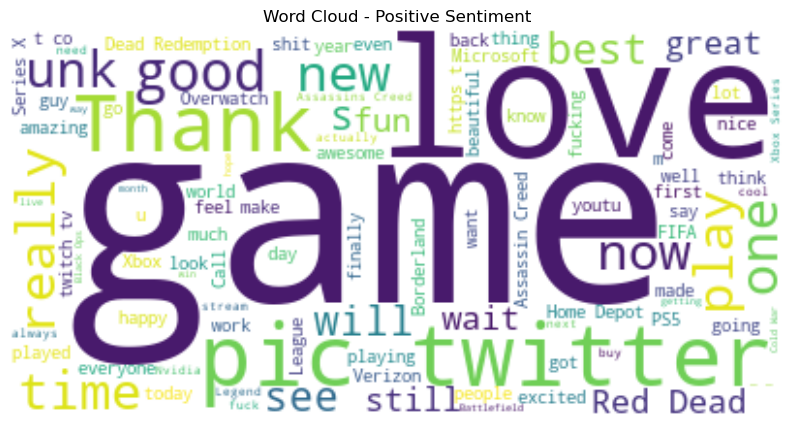

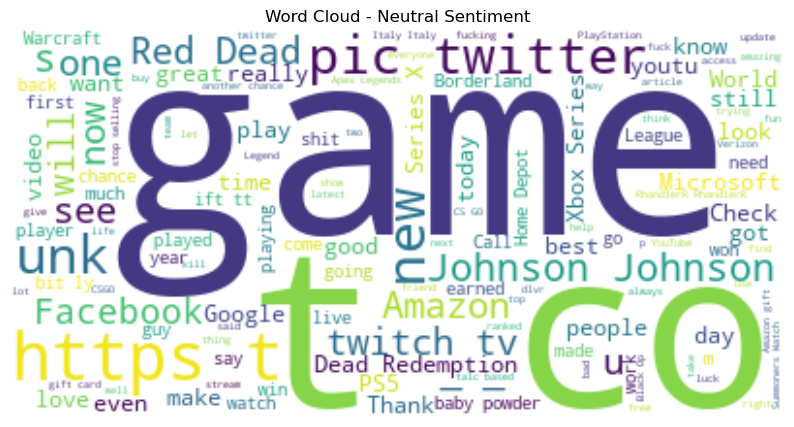

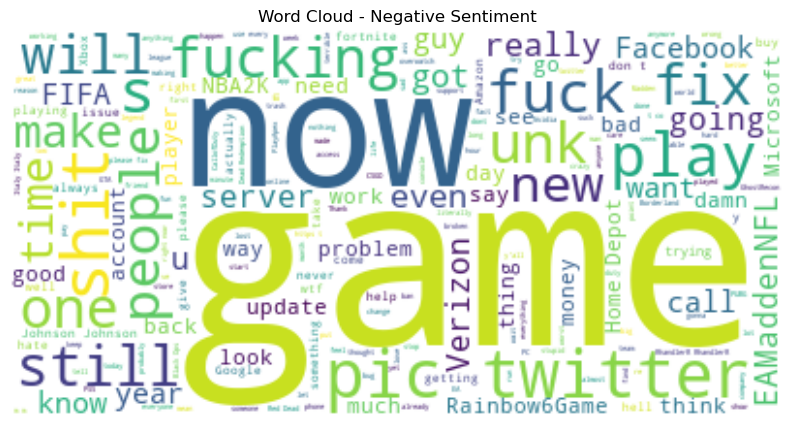

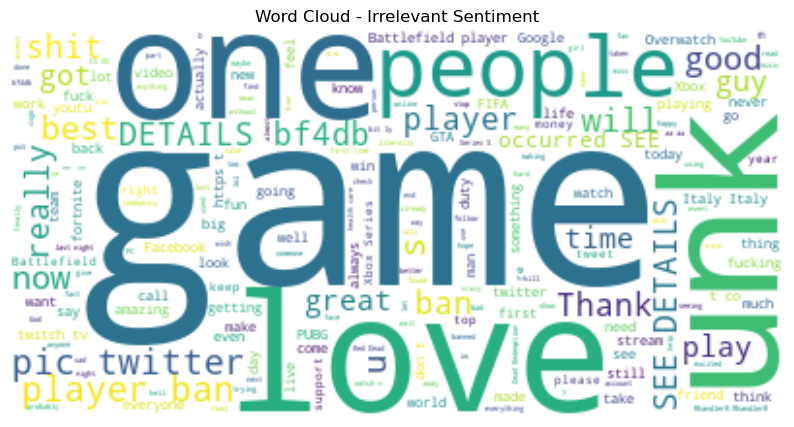


Accuracy: 0.7560666666666667

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.84      0.65      0.73      2666
    Negative       0.71      0.85      0.78      4464
     Neutral       0.83      0.66      0.74      3706
    Positive       0.72      0.80      0.76      4164

    accuracy                           0.76     15000
   macro avg       0.78      0.74      0.75     15000
weighted avg       0.77      0.76      0.75     15000



In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# --------------------------------------
# 1. Load Twitter Training & Validation
# --------------------------------------
train_df = pd.read_csv('twitter_training.csv', names=['tweet_id', 'sentiment', 'text'], header=None)
val_df = pd.read_csv('twitter_validation.csv', names=['tweet_id', 'sentiment', 'text'], header=None)

# Combine for EDA and modeling
df = pd.concat([train_df, val_df], ignore_index=True)

# Preview data
print("Combined dataset shape:", df.shape)
print(df['sentiment'].value_counts())

# --------------------------------------
# 2. Clean Sentiment Labels (Optional)
# --------------------------------------
# If needed, map sentiment labels (e.g., convert 0/1/2 to text)
# sentiment_map = {0: 'negative', 1: 'neutral', 2: 'positive'}
# df['sentiment'] = df['sentiment'].map(sentiment_map)

# Drop any NA values (in case there are malformed rows)
df.dropna(subset=['text', 'sentiment'], inplace=True)

# --------------------------------------
# 3. Sentiment Distribution
# --------------------------------------
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sentiment', palette='coolwarm')
plt.title('Sentiment Distribution')
plt.xticks(rotation=45)
plt.show()

# --------------------------------------
# 4. WordClouds by Sentiment
# --------------------------------------
def show_wordcloud(sentiment_label):
    text = " ".join(tweet for tweet in df[df['sentiment'] == sentiment_label]['text'])
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud - {sentiment_label.capitalize()} Sentiment")
    plt.show()

for sentiment in df['sentiment'].unique():
    show_wordcloud(sentiment)

# --------------------------------------
# 5. Vectorization & Model Training
# --------------------------------------
X = df['text']
y = df['sentiment']

vectorizer = CountVectorizer(stop_words='english')
X_vec = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)

# --------------------------------------
# 6. Evaluation
# --------------------------------------
y_pred = model.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
